**TITANIC SURVIVAL PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.shape

(418, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#dropping cabin and name columns
df.drop(['Cabin','Name'],axis=1,inplace=True)

In [ ]:
#filling missing values
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

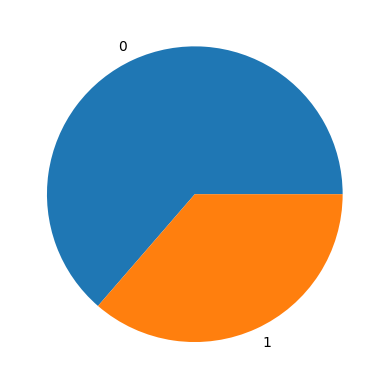

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
sur=df['Survived'].value_counts()
plt.pie(sur,labels=sur.index)
plt.show()
sur

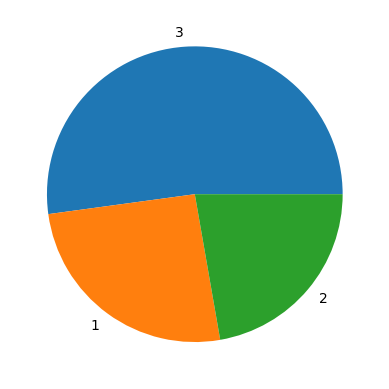

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [ ]:
pcls=df['Pclass'].value_counts()
plt.pie(pcls,labels=pcls.index)
plt.show()
pcls

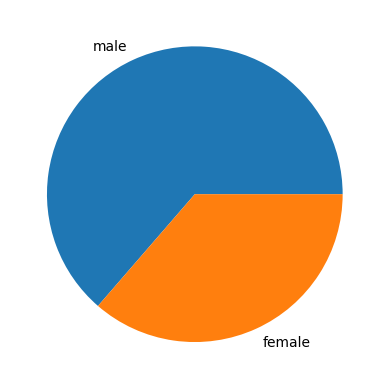

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
sex=df['Sex'].value_counts()
plt.pie(sex,labels=sex.index)
plt.show()
sex

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

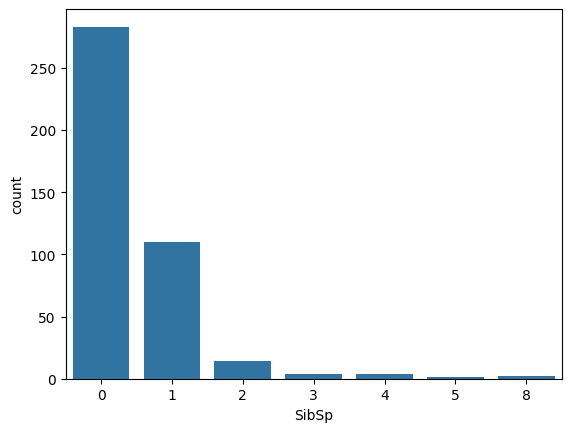

In [ ]:
import seaborn as sns
sibsp=df['SibSp'].value_counts()
sns.countplot(x='SibSp',data=df)
sibsp

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

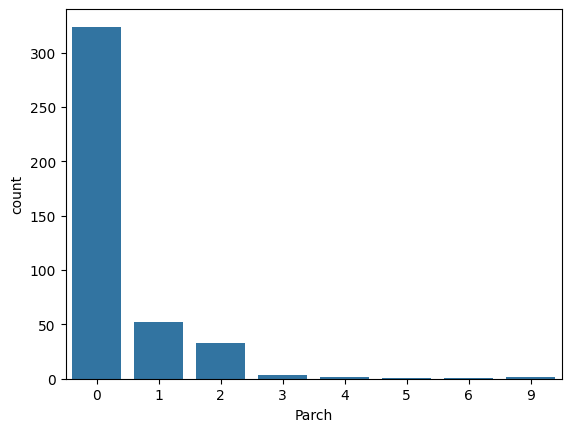

In [ ]:
par=df['Parch'].value_counts()
sns.countplot(x='Parch',data=df)
par

S    270
C    102
Q     46
Name: Embarked, dtype: int64

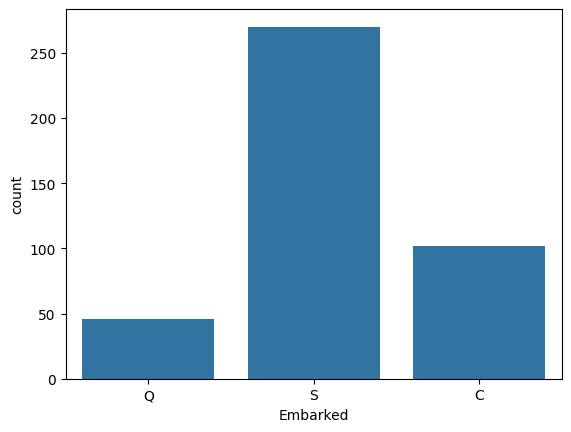

In [ ]:
emb=df['Embarked'].value_counts()
sns.countplot(x='Embarked',data=df)
emb

In [ ]:
#Encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Sex']=enc.fit_transform(df['Sex'])
df['Ticket']=enc.fit_transform(df['Ticket'])
df['Embarked']=enc.fit_transform(df['Embarked'])

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked         int64
dtype: object

In [ ]:
#Correlation
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.031621,0.003818,0.043080,-0.012301,0.008209,0.040699
Survived,-0.023245,1.000000,-0.108615,-1.000000,0.021962,0.099943,0.159120,0.047663,0.191382,-0.076281
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.503026,0.001087,0.018721,0.292088,-0.576619,0.227983
Sex,0.023245,-1.000000,0.108615,1.000000,-0.021962,-0.099943,-0.159120,-0.047663,-0.191382,0.076281
Age,-0.031621,0.021962,-0.503026,-0.021962,1.000000,-0.054656,-0.040213,-0.142253,0.366824,-0.126648
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.054656,1.000000,0.306895,0.025199,0.171488,0.052708
Parch,0.043080,0.159120,0.018721,-0.159120,-0.040213,0.306895,1.000000,0.109888,0.230001,0.054577
Ticket,-0.012301,0.047663,0.292088,-0.047663,-0.142253,0.025199,0.109888,1.000000,-0.018914,0.093672
Fare,0.008209,0.191382,-0.576619,-0.191382,0.366824,0.171488,0.230001,-0.018914,1.000000,-0.257031
Embarked,0.040699,-0.076281,0.227983,0.076281,-0.126648,0.052708,0.054577,0.093672,-0.257031,1.000000


<Axes: >

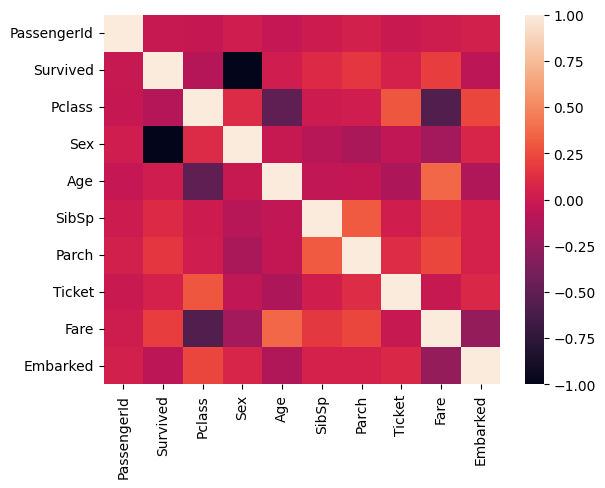

In [ ]:
sns.heatmap(df.corr())

In [ ]:
x=df.drop('Survived',axis=1).values
x

array([[8.92000e+02, 3.00000e+00, 1.00000e+00, ..., 1.52000e+02,
        7.82920e+00, 1.00000e+00],
       [8.93000e+02, 3.00000e+00, 0.00000e+00, ..., 2.21000e+02,
        7.00000e+00, 2.00000e+00],
       [8.94000e+02, 2.00000e+00, 1.00000e+00, ..., 7.30000e+01,
        9.68750e+00, 1.00000e+00],
       ...,
       [1.30700e+03, 3.00000e+00, 1.00000e+00, ..., 3.46000e+02,
        7.25000e+00, 2.00000e+00],
       [1.30800e+03, 3.00000e+00, 1.00000e+00, ..., 2.20000e+02,
        8.05000e+00, 2.00000e+00],
       [1.30900e+03, 3.00000e+00, 1.00000e+00, ..., 1.05000e+02,
        2.23583e+01, 0.00000e+00]])

In [ ]:
y=df['Survived'].values
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#Splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[1.2750e+03, 3.0000e+00, 0.0000e+00, ..., 2.4700e+02, 1.6100e+01,
        2.0000e+00],
       [1.2720e+03, 3.0000e+00, 1.0000e+00, ..., 2.3000e+02, 7.7500e+00,
        1.0000e+00],
       [9.1900e+02, 3.0000e+00, 1.0000e+00, ..., 1.2100e+02, 7.2250e+00,
        0.0000e+00],
       ...,
       [1.2880e+03, 3.0000e+00, 1.0000e+00, ..., 2.4400e+02, 7.2500e+00,
        1.0000e+00],
       [1.1270e+03, 3.0000e+00, 1.0000e+00, ..., 2.1800e+02, 7.8542e+00,
        2.0000e+00],
       [9.2900e+02, 3.0000e+00, 0.0000e+00, ..., 1.4100e+02, 8.6625e+00,
        2.0000e+00]])

In [ ]:
x_test

array([[1.250e+03, 3.000e+00, 1.000e+00, ..., 2.340e+02, 7.750e+00,
        1.000e+00],
       [1.056e+03, 2.000e+00, 1.000e+00, ..., 6.600e+01, 1.300e+01,
        2.000e+00],
       [9.090e+02, 3.000e+00, 1.000e+00, ..., 1.190e+02, 7.225e+00,
        0.000e+00],
       ...,
       [1.165e+03, 3.000e+00, 0.000e+00, ..., 2.420e+02, 1.550e+01,
        1.000e+00],
       [1.192e+03, 3.000e+00, 1.000e+00, ..., 1.820e+02, 7.775e+00,
        2.000e+00],
       [9.740e+02, 1.000e+00, 1.000e+00, ..., 4.700e+01, 2.600e+01,
        2.000e+00]])

In [ ]:
y_train

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1])

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
#Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[0.91846523, 1.        , 0.        , ..., 0.68232044, 0.03142511,
        1.        ],
       [0.91127098, 1.        , 1.        , ..., 0.63535912, 0.01512699,
        0.5       ],
       [0.0647482 , 1.        , 1.        , ..., 0.33425414, 0.01410226,
        0.        ],
       ...,
       [0.94964029, 1.        , 1.        , ..., 0.67403315, 0.01415106,
        0.5       ],
       [0.56354916, 1.        , 1.        , ..., 0.60220994, 0.01533038,
        1.        ],
       [0.08872902, 1.        , 0.        , ..., 0.38950276, 0.01690807,
        1.        ]])

In [ ]:
#Model Creation - DecisionTree
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='entropy')
d_tree.fit(x_train,y_train)
y_pred=d_tree.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

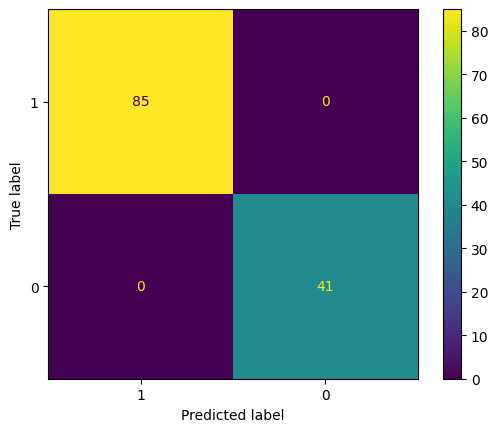

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,recall_score,precision_score,f1_score
label=[1,0]
cmd=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(cmd,display_labels=label)
dis.plot()

In [ ]:
print("Accuracy Score is",accuracy_score(y_test,y_pred))
print("Recall is",recall_score(y_test,y_pred))
print("Precision is",precision_score(y_test,y_pred))
print("F1 Score is",f1_score(y_test,y_pred))

Accuracy Score is 1.0
Recall is 1.0
Precision is 1.0
F1 Score is 1.0


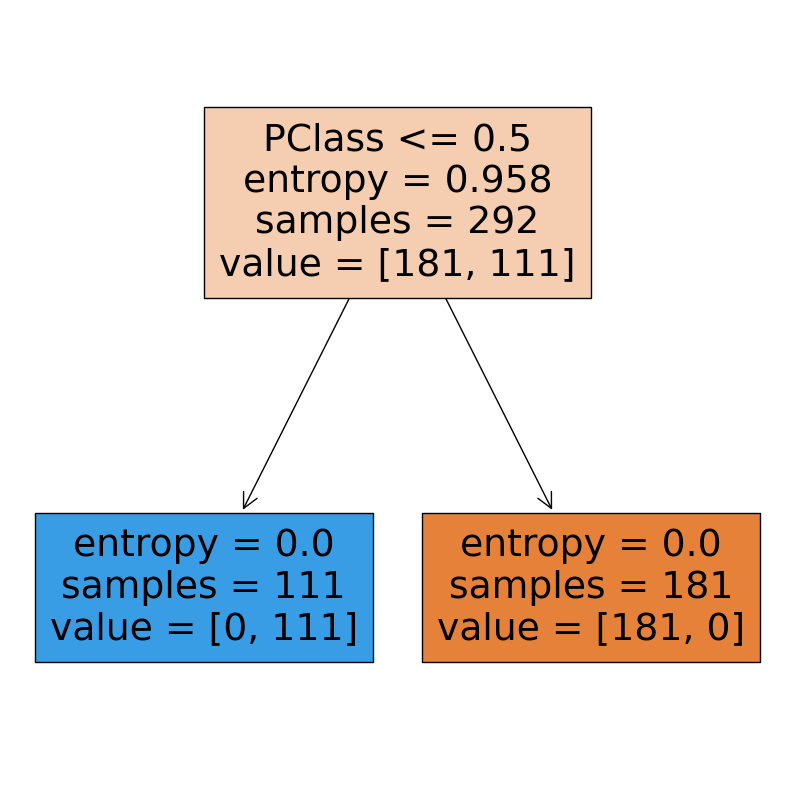

In [ ]:
#Decisiontree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(d_tree,feature_names=['PassengerID','Survived','PClass','Sex','Age','SibSp','Parch','Ticket','Fare'],filled=True)
plt.show()